In [1]:
using Percolation

# Nearest Neighbor

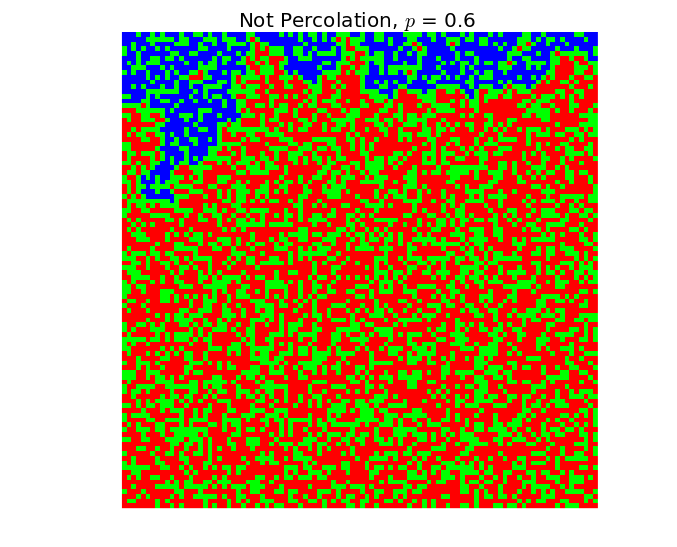

(0,
[1 1 … 1 1; 1 1 … 1 1; … ; 1 0 … 1 0; 1 1 … 1 1],

String["water" "water" … "water" "water"; "water" "water" … "water" "water"; … ; "block" "empty" … "block" "empty"; "block" "block" … "block" "block"])

In [2]:
# N: lattice size
# p: occupied probability
N = 100; p = 0.6
simple = simplenn(N, N, p)
percolation(simple, colorbar=false)

# next nearest neighbor

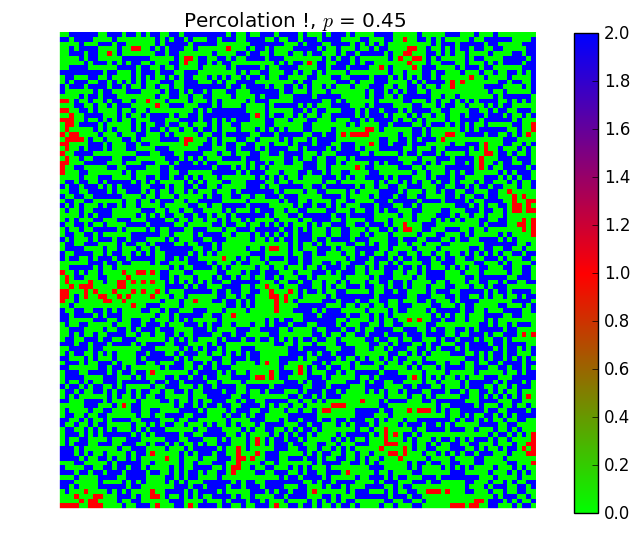

(1,
[0 0 … 0 0; 1 1 … 0 1; … ; 0 0 … 0 1; 1 1 … 1 0],

String["empty" "empty" … "empty" "empty"; "water" "water" … "empty" "water"; … ; "empty" "empty" … "empty" "water"; "block" "block" … "water" "empty"])

In [3]:
N = 100; p = 0.45
size = simplennn(N, N, p)
percolation(size)

## Order Parameter

In [4]:
using PyPlot

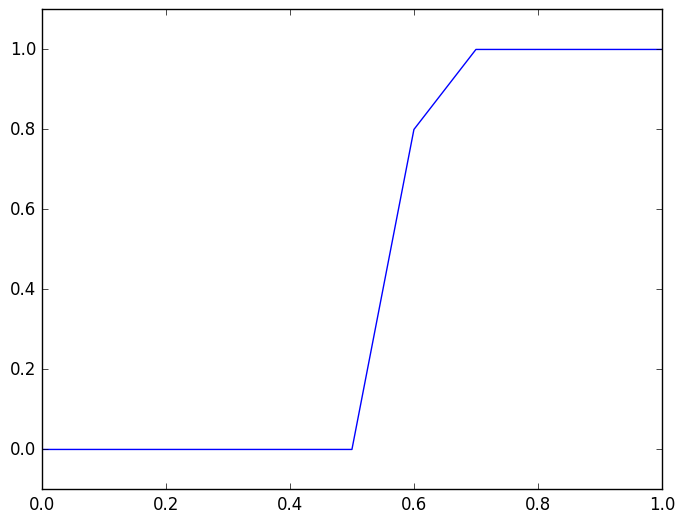

In [5]:
plist = collect(0:0.1:1)
hit = zeros(Int64, length(plist))
N = 100; trial = 10
for i in 1:length(plist)
    for itr in 1:trial
        simple = simplenn(N, N, plist[i])
        hit[i] += percolation(simple, fig=false, colorbar=false, water=false)[1];
    end
end
hit /= 10;
plot(plist, hit);
axis([0, 1, -0.1, 1.1]);